Crude Oil Prices Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
import os
from sklearn.linear_model import LinearRegression
import pylab
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from google.colab import drive
drive.mount('/content/drive')

<ipython-input-5-9e196014fe70>:12: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
<ipython-input-5-9e196014fe70>:13: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import spearmanr


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
#import the Raw Data
crude = pd.read_csv('/content/drive/MyDrive/Colab Notebooks 2/Python/Europe_Brent_Spot_Price_FOB.csv')
gdp = pd.read_excel('/content/drive/MyDrive/Colab Notebooks 2/Python/GDP-3.xlsx', sheet_name="Quarterly")
reliance = pd.read_excel('/content/drive/MyDrive/Colab Notebooks 2/Python/Reliance on Russian imports - PUBLIC (1).xlsx', sheet_name="Reliance_Fuel")
cpi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks 2/Python/cpi_monthly.csv')

In [ ]:
countries = ["ITALY","NETHLAND","GERMANY","POLAND"]
ita = reliance[reliance["COUNTRY"].isin(countries)][reliance.PRODUCT == "MTOTOIL"]
reliance_data = ita.iloc[:,[0,1,22,32]]
reliance_data

<ipython-input-7-4d6155fdfd67>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ita = reliance[reliance["COUNTRY"].isin(countries)][reliance.PRODUCT == "MTOTOIL"]


,COUNTRY,PRODUCT,2010,2020E
46,GERMANY,MTOTOIL,0.3479,0.3720
64,ITALY,MTOTOIL,0.2317,0.1870
88,NETHLAND,MTOTOIL,1.0600,0.9753
97,POLAND,MTOTOIL,0.8937,0.7773


In [ ]:
#filter countries that we want
countries = ["Italy","India","Türkiye, Rep of","China, P.R.: Mainland","Netherlands, The","Germany","Poland, Rep. of"]
#filter by location, time, and quarter
gdp_data = gdp[gdp["Country"].isin(countries)]
#Delete the scale
del gdp_data["Scale"]


#pivot to rearrange the data as we wanted
final_gdp = gdp_data.pivot_table(columns="Country")
final_gdp.reset_index(inplace=True)
#renamed all columns to look the same

final_gdp.rename(columns={"index": "TIME","China, P.R.: Mainland": "GDP China", "Germany": "GDP Germany", "India" :"GDP India", "Italy":"GDP Italy",
                          "Netherlands, The":"GDP Netherlands", "Poland, Rep. of":"GDP Poland", "Türkiye, Rep of": "GDP Turkey"}, inplace = True)

#Filled in the Na value with the mean
#change the object to time
final_gdp["TIME"]=pd.PeriodIndex(final_gdp.TIME, freq='Q')
final_gdp

Country,TIME,GDP China,GDP Germany,GDP India,GDP Italy,GDP Netherlands,GDP Poland,GDP Turkey
0,2010Q1,1292485.97,1176698.47,396890.17,717785.69,296400.76,108839.57,160949.02
1,2010Q2,1467465.29,1197519.08,374784.59,769702.1,309969.47,115173.23,186668.76
2,2010Q3,1565194.98,1243091.6,383982.85,762612.6,298513.36,117559.3,213397.38
3,2010Q4,1762286.56,1276583.97,439458.95,824860.31,314938.93,134171.94,215874.06
4,2011Q1,1616930.82,1320661.32,464810.37,781884.17,321126.25,119854.1,174836.54
5,2011Q2,1840208.95,1323486.97,437861.58,830897.8,331246.49,126407.69,202259.86
6,2011Q3,1958863.95,1367314.63,434855.37,821088.18,318531.06,129410.9,229630.35
7,2011Q4,2136079.55,1386452.91,481004.93,870249.7,332420.84,148674.52,232036.0
8,2012Q1,1859277.57,1256500.0,452590.9,716855.74,297994.44,115023.46,186936.42
9,2012Q2,2080491.13,1244648.15,432883.58,752731.3,308225.93,121247.04,214384.03


In [ ]:
#change the data type
crude['Month']=pd.to_datetime(crude['Month'])
cpi['TIME']=pd.to_datetime(cpi['TIME'])


#crude data
crude['Year']=crude['Month'].dt.year

crude_20102022=crude.query('Year >= 2010').rename(columns = {"Europe Brent Spot Price FOB Dollars per Barrel":"Brent Spot Price", 'Month':'TIME'}) #Dollar per Barrel
crude_20102022

<ipython-input-9-0854b13de0f0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crude['Month']=pd.to_datetime(crude['Month'])


,TIME,Brent Spot Price,Year
0,2022-11-01,91.42,2022
1,2022-10-01,93.33,2022
2,2022-09-01,89.76,2022
3,2022-08-01,100.45,2022
4,2022-07-01,111.93,2022
...,...,...,...
150,2010-05-01,75.95,2010
151,2010-04-01,84.82,2010
152,2010-03-01,78.83,2010
153,2010-02-01,73.75,2010


In [ ]:
#Using plotly.express

fig1 = px.line(crude_20102022, x='TIME', y="Brent Spot Price", title="Europe Brent Crude Oil Price Monthly Trend")
fig1.show()

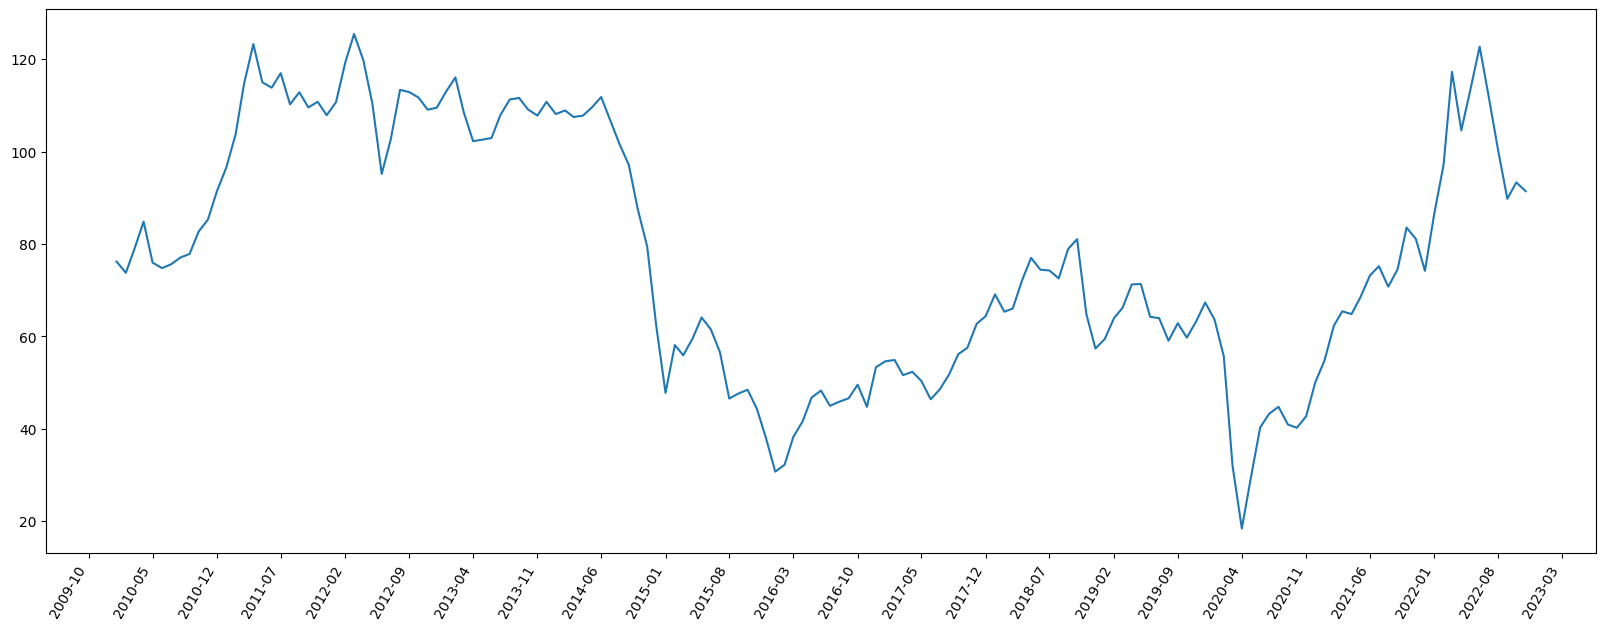

In [ ]:
plt.figure(figsize=(20,8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=7))
plt.gcf().autofmt_xdate()

plt.plot(crude_20102022['TIME'], crude_20102022['Brent Spot Price'])
plt.xticks(rotation=60)

plt.show()

In [ ]:
#cpi data
cpi['Mon']=cpi['TIME'].dt.month
cpi['Year']=cpi['TIME'].dt.year
cpi_20102022=cpi[['LOCATION','TIME','Value', 'Mon', 'Year']].query('Year >= 2010')
cpi_20102022=cpi_20102022[cpi_20102022.LOCATION.isin(["DEU","CHN","IND","ITA","NLD","POL","TUR"])]
piv_cpi = cpi_20102022.pivot_table(index='TIME', columns='LOCATION', values='Value')
piv_cpi.reset_index(inplace=True)
piv_cpi

LOCATION,TIME,CHN,DEU,IND,ITA,NLD,POL,TUR
0,2010-01-01,1.5,0.712106,16.216220,1.316752,0.817286,3.5,8.185208
1,2010-02-01,2.7,0.505561,14.864870,1.167883,0.822679,2.9,10.127850
2,2010-03-01,2.4,1.215806,14.864870,1.385850,1.012658,2.6,9.560819
3,2010-04-01,2.8,1.214575,13.333330,1.528384,1.131247,2.4,10.194260
4,2010-05-01,3.1,1.215806,13.907280,1.379811,0.954261,2.2,9.099822
...,...,...,...,...,...,...,...,...
149,2022-06-01,2.5,7.607699,6.162695,7.965451,8.552932,15.5,78.618400
150,2022-07-01,2.7,7.538601,5.781759,7.927412,10.287580,15.6,79.602050
151,2022-08-01,2.5,7.901907,5.853659,8.372978,11.959170,16.1,80.207600
152,2022-09-01,2.8,9.990917,6.488240,8.865586,14.532000,17.2,83.452490


In [ ]:
#check the null data
piv_cpi.isna().any() #ind have the null data
crude_20102022.isna().any() #doesnt have null data

#how many the null data
piv_cpi.isna().sum()

#fill in the null data
#we decided to use the mean to fill in the missing data (average in 2022)
piv_cpi_1=piv_cpi
piv_cpi_1['Year']=piv_cpi_1['TIME'].dt.year
ind_avg = piv_cpi_1.groupby('Year').mean().iat[12, 2]

piv_cpi = piv_cpi.fillna(ind_avg).rename(columns = {'CHN':'CPI China', 'DEU':'CPI Germany', 'IND':'CPI India', 'ITA':'CPI Italy', 'NLD':'CPI Netherlands', 'POL':'CPI Poland', 'TUR':'CPI Turkey'})

In [ ]:
piv_cpi['CPI Europe'] = piv_cpi[['CPI Germany', 'CPI Italy', 'CPI Netherlands', 'CPI Poland']].mean(axis=1)
piv_cpi

LOCATION,TIME,CPI China,CPI Germany,CPI India,CPI Italy,CPI Netherlands,CPI Poland,CPI Turkey,Year,CPI Europe
0,2010-01-01,1.5,0.712106,16.216220,1.316752,0.817286,3.5,8.185208,2010,1.586536
1,2010-02-01,2.7,0.505561,14.864870,1.167883,0.822679,2.9,10.127850,2010,1.349031
2,2010-03-01,2.4,1.215806,14.864870,1.385850,1.012658,2.6,9.560819,2010,1.553578
3,2010-04-01,2.8,1.214575,13.333330,1.528384,1.131247,2.4,10.194260,2010,1.568551
4,2010-05-01,3.1,1.215806,13.907280,1.379811,0.954261,2.2,9.099822,2010,1.437470
...,...,...,...,...,...,...,...,...,...,...
149,2022-06-01,2.5,7.607699,6.162695,7.965451,8.552932,15.5,78.618400,2022,9.906520
150,2022-07-01,2.7,7.538601,5.781759,7.927412,10.287580,15.6,79.602050,2022,10.338398
151,2022-08-01,2.5,7.901907,5.853659,8.372978,11.959170,16.1,80.207600,2022,11.083514
152,2022-09-01,2.8,9.990917,6.488240,8.865586,14.532000,17.2,83.452490,2022,12.647126


In [ ]:
#plot the CPI for Europe and the other 3 countries
fig2 = px.line(piv_cpi, x="TIME", y=["CPI Europe","CPI China","CPI India","CPI Turkey"],
              hover_data={"TIME": "|%B, %Y"},
              title='CPI Europe VS 3 Other Countries')
#fig2.update_xaxes(
#    dtick="M1",
#    tickformat="%b%Y")
fig2.show()

In [ ]:
df_gdp_plot = final_gdp.set_index(["TIME"])\
            .stack()\
            .reset_index(name='Value')\
            .rename(columns={'level_2':'Country'})

df_gdp_plot["TIME"]=pd.PeriodIndex(df_gdp_plot.TIME, freq='Q').to_timestamp()
quarter_filter = ["2018Q1", "2018Q2", "2018Q3", "2018Q4"]
df = df_gdp_plot[df_gdp_plot.TIME.isin(quarter_filter)]
fig3 = px.bar(df, x='TIME', y='Value', color='Country', labels={'y':'gdp nominal'},barmode='group',
            title='Evolution of world GDP')
fig3.show()

In [ ]:
new_data = piv_cpi.merge(crude_20102022, on = 'TIME', how = 'left')
new_data

,TIME,CPI China,CPI Germany,CPI India,CPI Italy,CPI Netherlands,CPI Poland,CPI Turkey,Year_x,CPI Europe,Brent Spot Price,Year_y
0,2010-01-01,1.5,0.712106,16.216220,1.316752,0.817286,3.5,8.185208,2010,1.586536,76.17,2010
1,2010-02-01,2.7,0.505561,14.864870,1.167883,0.822679,2.9,10.127850,2010,1.349031,73.75,2010
2,2010-03-01,2.4,1.215806,14.864870,1.385850,1.012658,2.6,9.560819,2010,1.553578,78.83,2010
3,2010-04-01,2.8,1.214575,13.333330,1.528384,1.131247,2.4,10.194260,2010,1.568551,84.82,2010
4,2010-05-01,3.1,1.215806,13.907280,1.379811,0.954261,2.2,9.099822,2010,1.437470,75.95,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
149,2022-06-01,2.5,7.607699,6.162695,7.965451,8.552932,15.5,78.618400,2022,9.906520,122.71,2022
150,2022-07-01,2.7,7.538601,5.781759,7.927412,10.287580,15.6,79.602050,2022,10.338398,111.93,2022
151,2022-08-01,2.5,7.901907,5.853659,8.372978,11.959170,16.1,80.207600,2022,11.083514,100.45,2022
152,2022-09-01,2.8,9.990917,6.488240,8.865586,14.532000,17.2,83.452490,2022,12.647126,89.76,2022


In [ ]:
#convert to quartely data
# new_data=new_data.groupby(pd.PeriodIndex(new_data.TIME, freq='Q')).mean().reset_index()

# Convert to quarterly data
new_data['TIME'] = pd.to_datetime(new_data['TIME'])  # Ensure 'TIME' column is in datetime format
new_data['TIME'] = new_data['TIME'].dt.to_period('Q')  # Convert datetime to quarterly period
new_data = new_data.groupby('TIME').mean().reset_index()  # Group by quarterly period and calculate mean



data_cpi_price=new_data.loc[:, ~new_data.columns.isin(['Year_x', 'Year_y'])]
data_cpi_price

,TIME,CPI China,CPI Germany,CPI India,CPI Italy,CPI Netherlands,CPI Poland,CPI Turkey,CPI Europe,Brent Spot Price
0,2010Q1,2.200000,0.811158,15.315320,1.290162,0.884208,3.000000,9.291292,1.496382,76.250000
1,2010Q2,2.933333,1.113157,13.655367,1.404812,0.970348,2.300000,9.220530,1.447079,78.510000
2,2010Q3,3.466667,1.110841,10.314165,1.618780,1.559226,2.166667,8.382584,1.613878,76.820000
3,2010Q4,4.700000,1.379300,9.165920,1.786077,1.688121,2.866667,7.436030,1.930041,86.466667
4,2011Q1,5.066667,1.876881,8.983128,2.338385,1.864219,3.833333,4.347629,2.478204,104.960000
5,2011Q2,5.733333,2.001368,8.917795,2.671351,2.118154,4.566667,5.891010,2.839385,117.360000
6,2011Q3,6.266667,2.197104,9.157200,2.805882,2.870858,4.100000,6.372954,2.993461,113.340000
7,2011Q4,4.600000,2.223464,8.406470,3.300181,2.507398,4.566667,9.196142,3.149427,109.396667
8,2012Q1,3.766667,2.138716,7.178455,3.249964,2.478452,4.100000,10.491467,2.991783,118.490000
9,2012Q2,2.866667,1.864028,10.142797,3.284555,2.205494,3.966667,9.429002,2.830186,108.416667


In [ ]:
#Merge the data (Crude price, CPI and GDP per country and year).
final_df = data_cpi_price.merge(final_gdp, on = 'TIME')

final_df = final_df.reindex(['TIME', 'Brent Spot Price','CPI China','CPI Germany','CPI India','CPI Italy','CPI Netherlands','CPI Poland','CPI Turkey','GDP China','GDP Germany','GDP India','GDP Italy','GDP Netherlands','GDP Poland','GDP Turkey'], axis = 1)
final_df

,TIME,Brent Spot Price,CPI China,CPI Germany,CPI India,CPI Italy,CPI Netherlands,CPI Poland,CPI Turkey,GDP China,GDP Germany,GDP India,GDP Italy,GDP Netherlands,GDP Poland,GDP Turkey
0,2010Q1,76.250000,2.200000,0.811158,15.315320,1.290162,0.884208,3.000000,9.291292,1292485.97,1176698.47,396890.17,717785.69,296400.76,108839.57,160949.02
1,2010Q2,78.510000,2.933333,1.113157,13.655367,1.404812,0.970348,2.300000,9.220530,1467465.29,1197519.08,374784.59,769702.1,309969.47,115173.23,186668.76
2,2010Q3,76.820000,3.466667,1.110841,10.314165,1.618780,1.559226,2.166667,8.382584,1565194.98,1243091.6,383982.85,762612.6,298513.36,117559.3,213397.38
3,2010Q4,86.466667,4.700000,1.379300,9.165920,1.786077,1.688121,2.866667,7.436030,1762286.56,1276583.97,439458.95,824860.31,314938.93,134171.94,215874.06
4,2011Q1,104.960000,5.066667,1.876881,8.983128,2.338385,1.864219,3.833333,4.347629,1616930.82,1320661.32,464810.37,781884.17,321126.25,119854.1,174836.54
5,2011Q2,117.360000,5.733333,2.001368,8.917795,2.671351,2.118154,4.566667,5.891010,1840208.95,1323486.97,437861.58,830897.8,331246.49,126407.69,202259.86
6,2011Q3,113.340000,6.266667,2.197104,9.157200,2.805882,2.870858,4.100000,6.372954,1958863.95,1367314.63,434855.37,821088.18,318531.06,129410.9,229630.35
7,2011Q4,109.396667,4.600000,2.223464,8.406470,3.300181,2.507398,4.566667,9.196142,2136079.55,1386452.91,481004.93,870249.7,332420.84,148674.52,232036.0
8,2012Q1,118.490000,3.766667,2.138716,7.178455,3.249964,2.478452,4.100000,10.491467,1859277.57,1256500.0,452590.9,716855.74,297994.44,115023.46,186936.42
9,2012Q2,108.416667,2.866667,1.864028,10.142797,3.284555,2.205494,3.966667,9.429002,2080491.13,1244648.15,432883.58,752731.3,308225.93,121247.04,214384.03


In [ ]:
copy = final_df.copy()
country = ["China","India","Turkey","India","Poland","Netherlands","Italy","Germany"]
country_df = pd.DataFrame(country)
country_df

,0
0,China
1,India
2,Turkey
3,India
4,Poland
5,Netherlands
6,Italy
7,Germany


In [ ]:
#plot the CPI for Italy as it has the highest correlation
import plotly.express as px
fig2 = px.scatter(final_df, x="Brent Spot Price", y=["CPI Italy"],title='Correlation between Brent Spot Price and CPI')
fig2
fig2.update(layout_yaxis_range = [0,10])

In [ ]:
qq_cpi_china = final_df.iloc[:,2]
qq_cpi_germany = final_df.iloc[:,3]
qq_cpi_india = final_df.iloc[:,4]
qq_cpi_italy = final_df.iloc[:,5]
qq_cpi_neth = final_df.iloc[:,6]

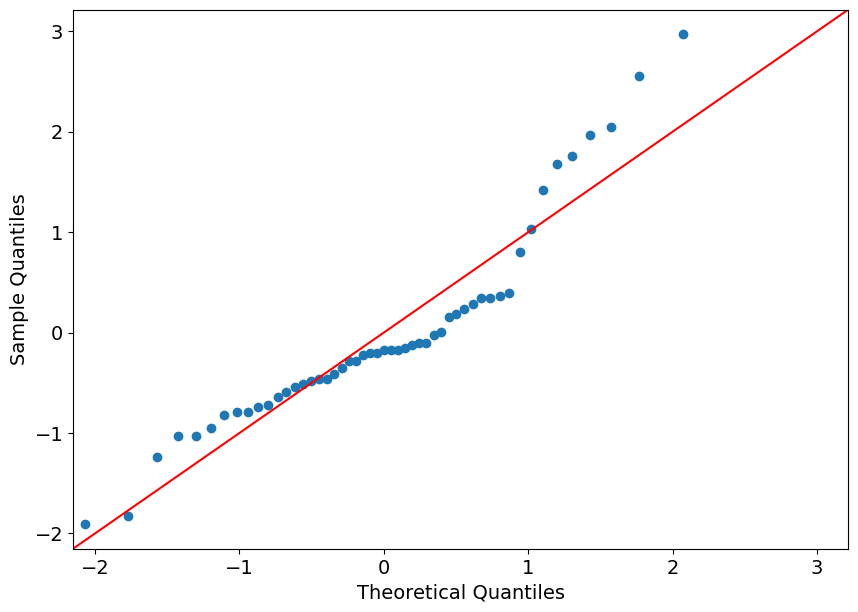

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]
plt.rc('font', size=14)
from scipy.stats import norm, uniform
qqplot(qq_cpi_china,norm,fit=True,line="45")
plt.show()

In [ ]:
#CPI China
coefchina,pchina = spearmanr(final_df['Brent Spot Price'], final_df['CPI China'])
print('Spearmans correlation coefficient: %.3f' % coefchina)
# interpret the significance
alpha = 0.05
if pchina > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.7f' % pchina)
else:
 print('Samples are correlated (reject H0) p=%.7f' % pchina)

#CPI India
coefindia,pindia = spearmanr(final_df['Brent Spot Price'], final_df['CPI India'])
print('Spearmans correlation coefficient: %.3f' % coefindia)
# interpret the significance
alpha = 0.05
if pindia > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.7f' % pindia)
else:
 print('Samples are correlated (reject H0) p=%.7f' % pindia)

#CPI Turkey
coefturkey,pturkey = spearmanr(final_df['Brent Spot Price'], final_df['CPI India'])
print('Spearmans correlation coefficient: %.3f' % coefindia)
# interpret the significance
alpha = 0.05
if pindia > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.7f' % pindia)
else:
 print('Samples are correlated (reject H0) p=%.7f' % pindia)

Spearmans correlation coefficient: 0.480
Samples are correlated (reject H0) p=0.0003693
Spearmans correlation coefficient: 0.637
Samples are correlated (reject H0) p=0.0000005
Spearmans correlation coefficient: 0.637
Samples are correlated (reject H0) p=0.0000005


In [ ]:
#Box Plots
# sns.boxplot(x = final_df["CPI China"])
# sns.boxplot(x = final_df["CPI Italy"])
# sns.boxplot(x = final_df["CPI Turkey"])
# sns.boxplot(x = final_df["CPI Poland"])
# sns.boxplot(x = final_df["CPI India"])
# sns.boxplot(x = final_df["CPI Germany"])



In [ ]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
# kChina  = kstest(final_df['CPI China'], 'norm') #The Kolmogorov-Smirnov test is used to test the null hypothesis that a set of data comes from a Normal distribution.
# #The p value here proves that data does NOT come a Normal distribution
# # kChina
# kindia = kstest(final_df['CPI India'], 'norm')
# # kindia
# kGermany = kstest(final_df['CPI Germany'], 'norm')
# # kGermany
# kPoland= kstest(final_df['CPI Poland'], 'norm')
# kPoland
kNetherlands= kstest(final_df['CPI Netherlands'], 'norm')
kNetherlands
kTurkey= kstest(final_df['CPI Turkey'], 'norm')
kTurkey
kItaly= kstest(final_df['CPI Italy'], 'norm')
kItaly



KstestResult(statistic=0.39045833243086636, pvalue=1.6283960987478045e-07, statistic_location=0.9223649666666667, statistic_sign=-1)

In [ ]:
### Useless because it is for normal distribution and our data is not normally distributed
### but not deleted because who know's and Wedad is afraid of deleting stuff

#Correlation China
# print("China",pearsonr(final_df['Brent Spot Price'],final_df['CPI China'])) #significants

#Correlation India
# print("India",pearsonr(final_df['Brent Spot Price'],final_df['CPI India'])) #significant

#Correlation Turkey
# print("Turkey",pearsonr(final_df['Brent Spot Price'],final_df['CPI Turkey'])) #not signficant

#EU
#Correlation Germany
# print("Germany",pearsonr(final_df['Brent Spot Price'],final_df['CPI Germany'])) # signficant

#Correlation Italy
# print("Italy",pearsonr(final_df['Brent Spot Price'],final_df['CPI Italy'])) #significant

#Correlation Netherlands
# print("Netherlands",pearsonr(final_df['Brent Spot Price'],final_df['CPI Netherlands'])) #significant

#Correlation Poland
# print("Poland",pearsonr(final_df['Brent Spot Price'],final_df['CPI Poland'])) #significant

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



<Axes: >

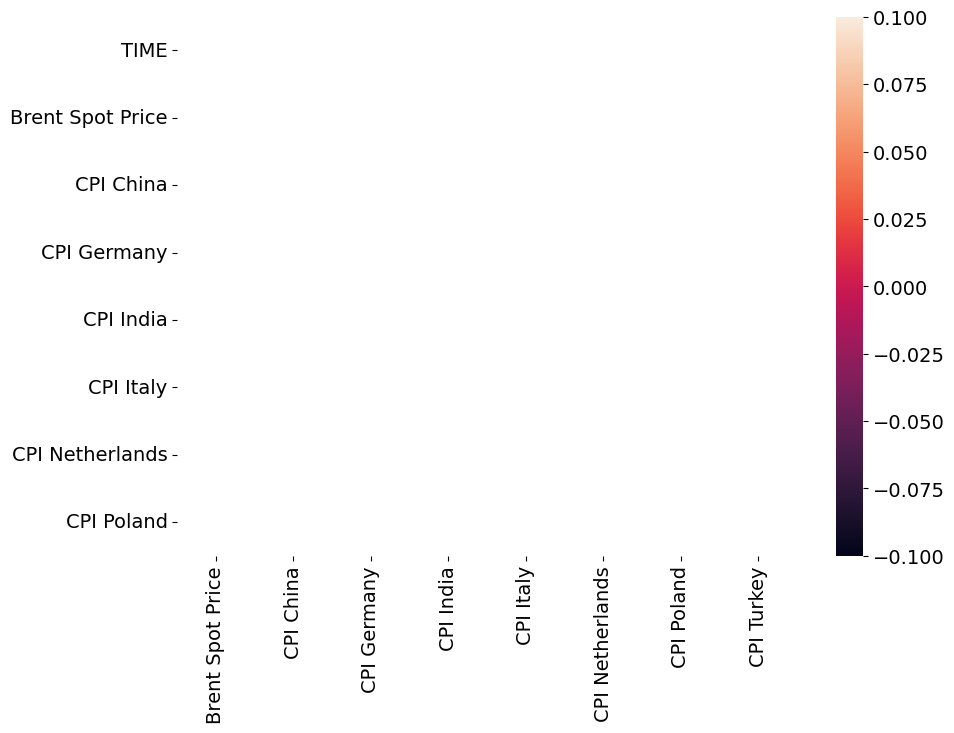

In [ ]:
#CPI heatmap to show correlation
sns.heatmap(cpi_cor_df, annot=True, annot_kws={"size": 10})

In [ ]:
#Correlation China
print("China",pearsonr(final_df['Brent Spot Price'],final_df['GDP China'])) #significants

#Correlation India
print("India",pearsonr(final_df['Brent Spot Price'],final_df['GDP India'])) #significant

#Correlation Turkey
print("Turkey",pearsonr(final_df['Brent Spot Price'],final_df['GDP Turkey'])) #not signficant

#EU
#Correlation Germany
print("Germany",pearsonr(final_df['Brent Spot Price'],final_df['GDP Germany'])) # not signficant

#Correlation Italy
print("Italy",pearsonr(final_df['Brent Spot Price'],final_df['GDP Italy'])) #significant

#Correlation Netherlands
print("Netherlands",pearsonr(final_df['Brent Spot Price'],final_df['GDP Netherlands'])) #not significant

#Correlation Poland
print("Poland",pearsonr(final_df['Brent Spot Price'],final_df['GDP Poland'])) #not significant

China PearsonRResult(statistic=-0.3646498278441767, pvalue=0.008517742623064954)
India PearsonRResult(statistic=-0.34133585210713846, pvalue=0.014233739844619234)
Turkey PearsonRResult(statistic=0.23061508749755535, pvalue=0.10349912106011665)
Germany PearsonRResult(statistic=-0.13020657233925165, pvalue=0.3624567449207322)
Italy PearsonRResult(statistic=0.2709449263235388, pvalue=0.0544667051159545)
Netherlands PearsonRResult(statistic=0.018808075561044864, pvalue=0.8957767510985274)
Poland PearsonRResult(statistic=-0.0033138446602133387, pvalue=0.9815873093873403)


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



<Axes: >

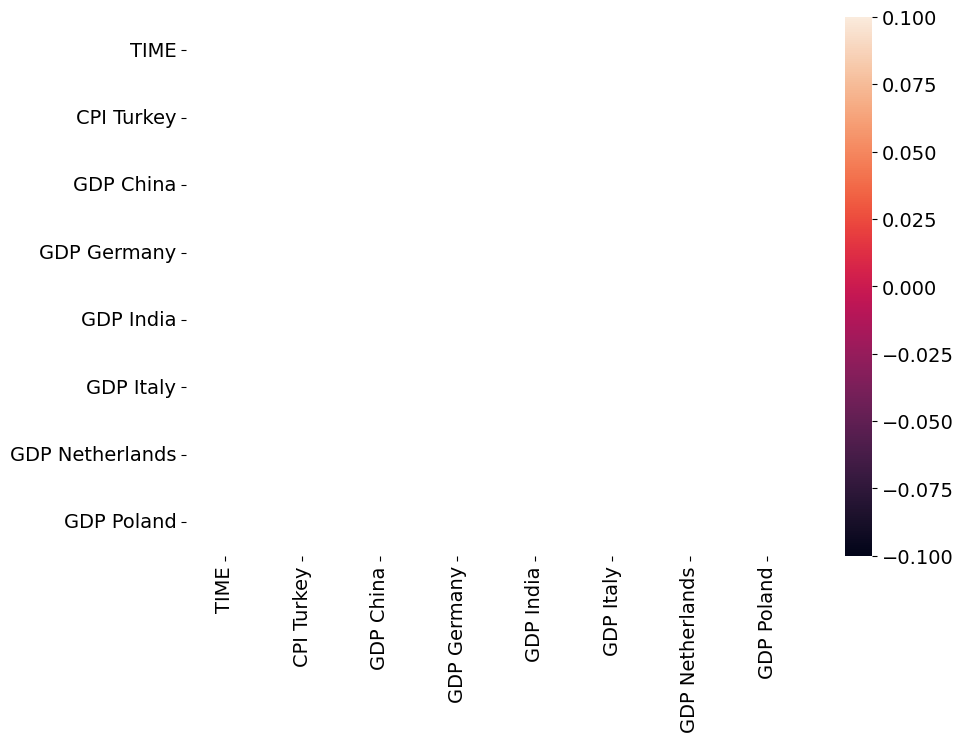

In [ ]:
sns.heatmap(gdp_cor_df, annot=True,annot_kws={"size": 10})
# pt.scatter(x =     )


In [ ]:
#make new dataframe

final_gdp_2 = final_gdp.rename(columns = {'GDP China':'CHN', 'GDP Germany':'DEU','GDP India':'IND', 'GDP Italy':'ITA', 'GDP Netherlands':'NLD', 'GDP Poland':'POL', 'GDP Turkey':'TUR'})

final_gdp_2=final_gdp_2.melt(id_vars=["TIME"],
        var_name="Country",
        value_name="Value").sort_values(["TIME", "Country"]).reset_index(drop=True)

In [ ]:
data_cpi_price_2 = data_cpi_price.rename(columns = {'CPI China':'CHN', 'CPI Germany':'DEU','CPI India':'IND', 'CPI Italy':'ITA', 'CPI Netherlands':'NLD', 'CPI Poland':'POL', 'CPI Turkey':'TUR'})

data_cpi_price_2=data_cpi_price_2.melt(id_vars=["TIME","Brent Spot Price"],
        var_name="Country",
        value_name="Value").sort_values(["TIME", "Country","Brent Spot Price"]).reset_index(drop=True)

In [ ]:
causality_df=pd.merge(data_cpi_price_2, final_gdp_2, on=["TIME", "Country"]).rename(columns={'Value_x':'CPI', 'Value_y':'GDP'})
causality_df

,TIME,Brent Spot Price,Country,CPI,GDP
0,2010Q1,76.250000,CHN,2.200000,1292485.97
1,2010Q1,76.250000,DEU,0.811158,1176698.47
2,2010Q1,76.250000,IND,15.315320,396890.17
3,2010Q1,76.250000,ITA,1.290162,717785.69
4,2010Q1,76.250000,NLD,0.884208,296400.76
...,...,...,...,...,...
352,2022Q3,100.713333,IND,6.041219,790371.46
353,2022Q3,100.713333,ITA,8.388659,497265.53
354,2022Q3,100.713333,NLD,12.259583,247034.18
355,2022Q3,100.713333,POL,16.300000,176121.07


In [78]:
import numpy as np
import statsmodels.api as sm

# Convert to numpy arrays and handle missing values if necessary
y = np.asarray(causality_df_dumm['CPI'], dtype=np.float64)  # Convert 'CPI' column to numpy array with float64 data type
x_cols = ['Brent Spot Price', 'Country_DEU', 'Country_IND', 'Country_ITA', 'Country_NLD', 'Country_POL', 'Country_TUR']
x = np.asarray(causality_df_dumm[x_cols].assign(const=1), dtype=np.float64)  # Convert selected columns to numpy array with float64 data type, add constant column

# Check for missing values
if np.isnan(y).any() or np.isnan(x).any():
    raise ValueError("Missing values detected. Please handle missing values before fitting the model.")

# Fit the OLS model
resultsCPI = sm.OLS(y, x).fit()
print(resultsCPI.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     29.66
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           4.55e-32
Time:                        16:18:59   Log-Likelihood:                -1138.0
No. Observations:                 357   AIC:                             2292.
Df Residuals:                     349   BIC:                             2323.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0475      0.012      3.943      0.0

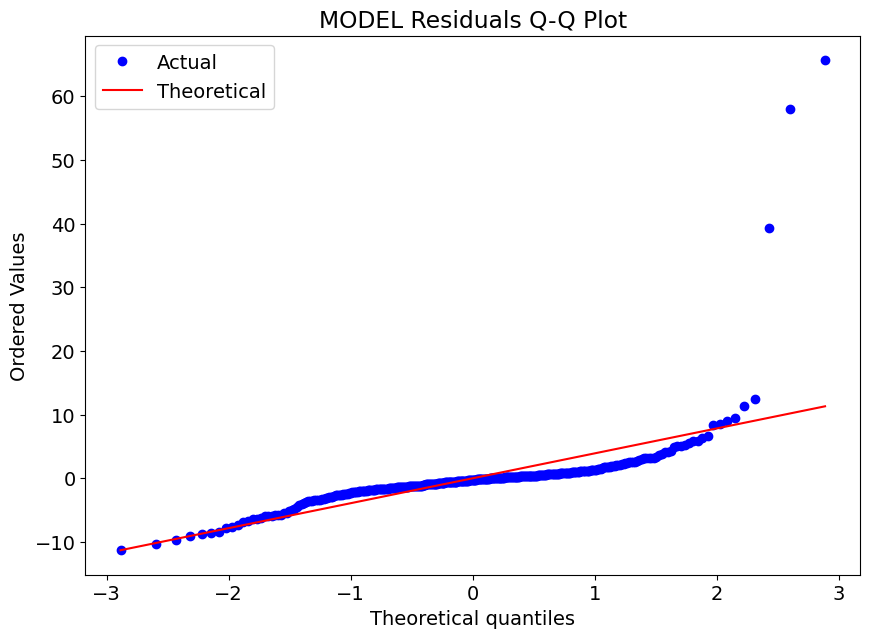

In [79]:
# create a DataFrame of predicted values and residuals
#causality_df["predictedCPI"] = resultsCPI.predict(x)
#causality_df["residualsCPI"] = resultsCPI.resid
#sns.scatterplot(data=causality_df, x="predicted", y="residuals")
#plt.axhline(y=0)

#Import library
from scipy import stats
stats.probplot(resultsCPI.resid, dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])

#check Residual Plot
#fig = plt.figure(figsize = (10, 7))
#sns.residplot(df_cpi_nld.Brent_Spot_Price, df_cpi_nld.CPI, color='magenta')

#Import library
#from scipy import stats
#stats.probplot(mod_cpi_italy.resid, dist="norm", plot= plt)
#plt.title("MODEL Residuals Q-Q Plot")
#plt.legend(['Actual','Theoretical'])

In [81]:

# Convert to dummy variables
causality_df_dumm = pd.get_dummies(causality_df, columns=['Country'], prefix='Country', drop_first=True)

# Convert to numpy arrays and handle missing values if necessary
y1 = np.asarray(causality_df_dumm['GDP'], dtype=np.float64)  # Convert 'GDP' column to numpy array with float64 data type
x1_cols = ['Brent Spot Price', 'Country_DEU', 'Country_IND', 'Country_ITA', 'Country_NLD', 'Country_POL', 'Country_TUR']
x1 = np.asarray(causality_df_dumm[x1_cols].assign(const=1), dtype=np.float64)  # Convert selected columns to numpy array with float64 data type, add constant column

# Check for missing values
if np.isnan(y1).any() or np.isnan(x1).any():
    raise ValueError("Missing values detected. Please handle missing values before fitting the model.")

# Fit the OLS model
resultsGDP = sm.OLS(y1, x1).fit()
print(resultsGDP.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     370.0
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.98e-157
Time:                        16:20:01   Log-Likelihood:                -5050.3
No. Observations:                 357   AIC:                         1.012e+04
Df Residuals:                     349   BIC:                         1.015e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1918.1726    691.684     -2.773      0.0

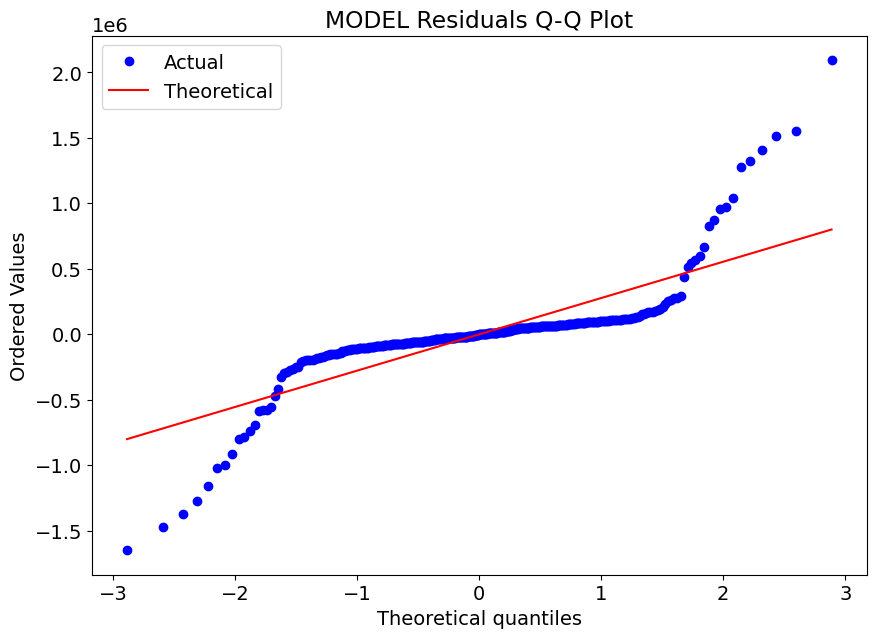

In [83]:
# create a DataFrame of predicted values and residuals
#causality_df["predictedGDP"] = resultsGDP.predict(x1)
#causality_df["residualsGDP"] = resultsGDP.resid
#sns.scatterplot(data=causality_df, x="predictedGDP", y="residualsGDP")
#plt.axhline(y=0)

#Import library
from scipy import stats
stats.probplot(resultsGDP.resid, dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])

In [87]:

# Convert to dummy variables
causality_df_dumm = pd.get_dummies(causality_df, columns=['Country'], prefix='Country', drop_first=True)

# Create polynomial features
x2 = causality_df_dumm[['Brent Spot Price', 'Country_DEU', 'Country_IND', 'Country_ITA', 'Country_NLD', 'Country_POL', 'Country_TUR']].assign(const=1)
x2['brent spot price degree 2'] = causality_df_dumm['Brent Spot Price'] ** 2

# Convert to numpy arrays and handle missing values if necessary
y1 = np.asarray(causality_df_dumm['GDP'], dtype=np.float64)  # Convert 'GDP' column to numpy array with float64 data type
x2 = np.asarray(x2, dtype=np.float64)  # Convert 'x2' DataFrame to numpy array with float64 data type

# Check for missing values
if np.isnan(y1).any() or np.isnan(x2).any():
    raise ValueError("Missing values detected. Please handle missing values before fitting the model.")

# Fit the OLS model
resultsGDPpoly = sm.OLS(y1, x2).fit()
print(resultsGDPpoly.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     327.3
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          7.27e-157
Time:                        16:22:50   Log-Likelihood:                -5048.2
No. Observations:                 357   AIC:                         1.011e+04
Df Residuals:                     348   BIC:                         1.015e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8648.0215   5177.596      1.670      0.0

In [148]:
causality_df

,TIME,Brent Spot Price,Country,CPI,GDP
0,2010Q1,76.250000,CHN,2.200000,1292485.97
1,2010Q1,76.250000,DEU,0.811158,1176698.47
2,2010Q1,76.250000,IND,15.315320,396890.17
3,2010Q1,76.250000,ITA,1.290162,717785.69
4,2010Q1,76.250000,NLD,0.884208,296400.76
...,...,...,...,...,...
352,2022Q3,100.713333,IND,6.041219,790371.46
353,2022Q3,100.713333,ITA,8.388659,497265.53
354,2022Q3,100.713333,NLD,12.259583,247034.18
355,2022Q3,100.713333,POL,16.300000,176121.07


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [97]:
%reload_ext rpy2.ipython

In [96]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314927 sha256=6c60ecae0e98c60333038102bf67525dd87b06e255e8ddbc27aa6d1134f4d79b
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


In [98]:
# Import rpy2 for dataframe conversion
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import globalenv

In [105]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate some random data to fit
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = np.random.randint(low=0, high=2, size=20)

# Transform the data to a polynomial feature space
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit a linear regression model on the transformed data
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions on the original data
y_pred = model.predict(poly.transform(X))


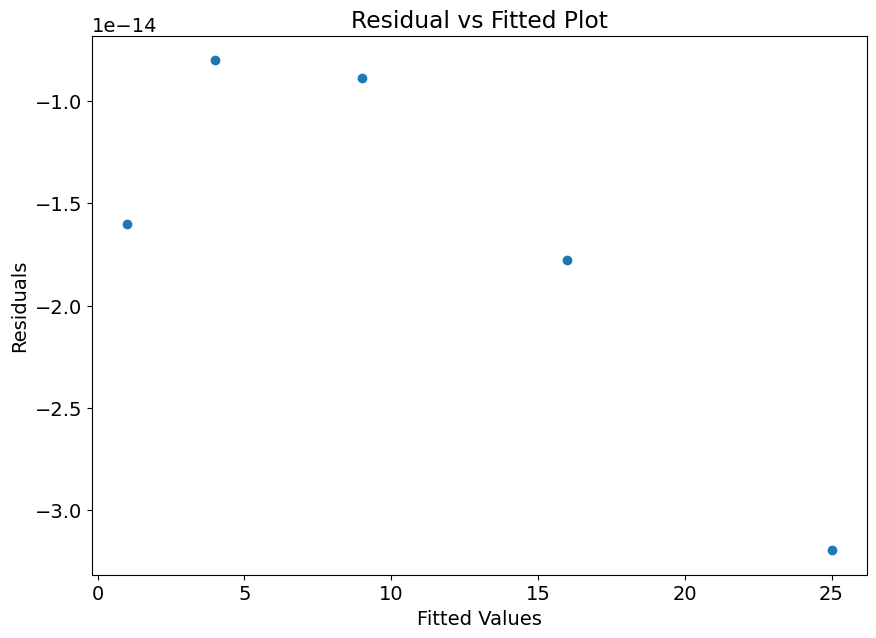

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# create sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])

# fit a polynomial model
model = np.polyfit(x, y, 2)

# predict y values using the model
predicted_y = np.polyval(model, x)

# calculate residuals
residuals = y - predicted_y

# plot residuals vs fitted values
plt.scatter(predicted_y, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted Plot")

plt.show()


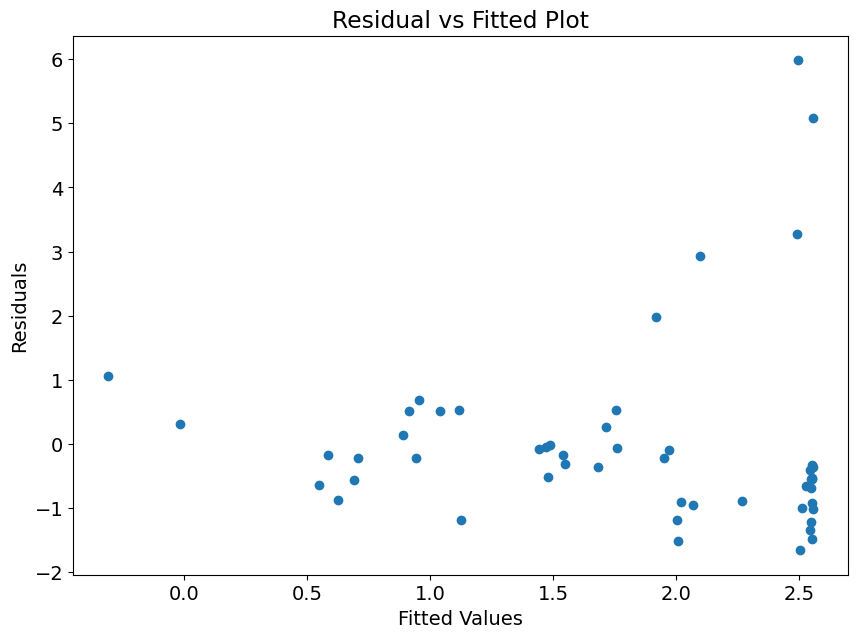

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# create sample data
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([1, 4, 9, 16, 25])
new = causality_df.loc[causality_df["Country"] == "DEU"]

x = new["Brent Spot Price"]
y = new["CPI"]
# print(x)

# fit a polynomial model
model = np.polyfit(x, y, 2)

# predict y values using the model
predicted_y = np.polyval(model, x)

# calculate residuals
residuals = y - predicted_y

# plot residuals vs fitted values
plt.scatter(predicted_y, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted Plot")

plt.show()
